<a href="https://colab.research.google.com/github/LouisKimDev/MobilityVisionSystem/blob/main/MVS_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

차량 비전 시스템 과제 3 <br>
전자공학과 / 김도윤 / 5428362

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

Question 1. Noise removal - fce(salt_peppr noise).bmp 이미지를 활용하여 아래 3가지 필터링을 적용 후 결과를 비교분석 하시오

<ipython-input-59-a90471108d06>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ave_kernel = np.ones((3, 3), dtype = np.float )/ 9.0


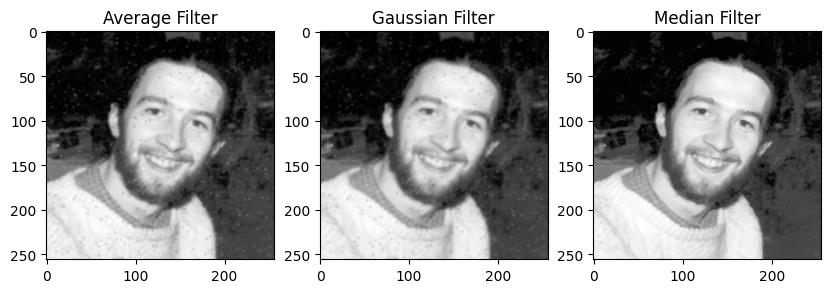

In [59]:
Q1_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW3_image/fce(salt_pepper noise).bmp")
Q1_img = cv2.cvtColor(Q1_img, cv2.COLOR_BGR2GRAY)

# 1) Average filtering 적용 결과
ave_kernel = np.ones((3, 3), dtype = np.float )/ 9.0
Q1_1=cv2.filter2D(Q1_img, -1, ave_kernel)

plt.figure(figsize = (10,7))
plt.subplot(1,3,1)
plt. title("Average Filter")
plt.imshow(Q1_1, cmap = 'gray')

# 2) Gaussian filtering 적용 결과
Q1_2 = cv2.GaussianBlur(Q1_img, (0,0), 1)

plt.subplot(1,3,2)
plt. title("Gaussian Filter")
plt.imshow(Q1_2, cmap = 'gray')

# 3) Median filtering 적용 결과
Q1_3 = cv2.medianBlur(Q1_img, 3)

plt.subplot(1,3,3)
plt. title("Median Filter")
plt.imshow(Q1_3, cmap = 'gray')

plt.show()

Question 2. Noise removal - Copy of Lena-Gaussian-noise2.jpg 이미지를 활용하여 1번의 1),2),3) 수행한 후 결과 비교분석

<ipython-input-60-6776dec7268e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ave_kernel = np.ones((3, 3), dtype = np.float )/ 9.0


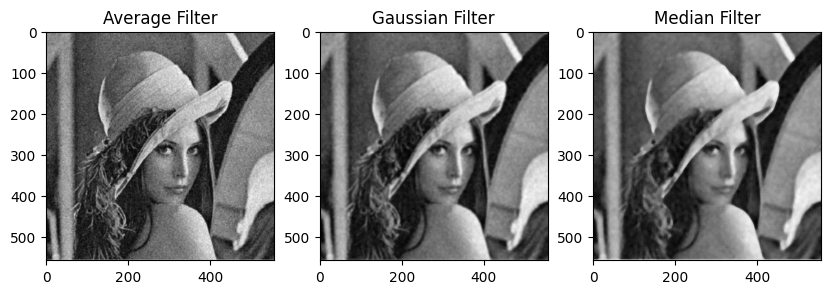

In [60]:
Q2_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW3_image/Copy of Lena-Gaussian-noise2.jpg")
Q2_img = cv2.cvtColor(Q2_img, cv2.COLOR_BGR2GRAY)

# 1) Average filtering 적용 결과
ave_kernel = np.ones((3, 3), dtype = np.float )/ 9.0
Q2_1=cv2.filter2D(Q2_img, -1, ave_kernel)

plt.figure(figsize = (10,7))
plt.subplot(1,3,1)
plt. title("Average Filter")
plt.imshow(Q2_1, cmap = 'gray')

# 2) Gaussian filtering 적용 결과
Q2_2 = cv2.GaussianBlur(Q2_img, (0,0), 2)

plt.subplot(1,3,2)
plt. title("Gaussian Filter")
plt.imshow(Q2_2, cmap = 'gray')

# 3) Median filtering 적용 결과
Q2_3 = cv2.medianBlur(Q2_img, 9)

plt.subplot(1,3,3)
plt. title("Median Filter")
plt.imshow(Q2_3, cmap = 'gray')
plt.show()

Question 3. flower.bmp 이용하여 다음을 수행하고 결과 비교 분석

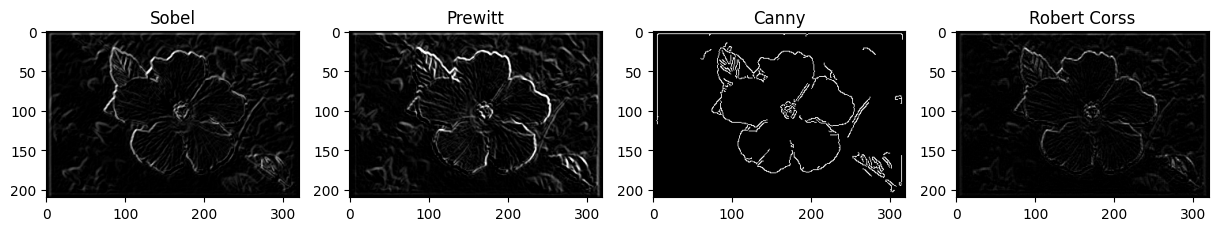

In [58]:
Q3_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW3_image/flower.bmp")
Q3_img = cv2.cvtColor(Q3_img, cv2.COLOR_BGR2GRAY)

# 1) sobel 적용 후 엣지 검출
Q3_x = cv2.Sobel(Q3_img, -1, 1, 0)
Q3_y = cv2.Sobel(Q3_img, -1, 0, 1)
sobel_x = cv2.convertScaleAbs(Q3_x)
soble_y = cv2.convertScaleAbs(Q3_y)
Q3_1 = cv2.addWeighted(sobel_x, 0.5, soble_y, 0.5, 0)

plt.figure(figsize = (15,10))
plt.subplot(1,4,1)
plt. title("Sobel")
plt.imshow(Q3_1, cmap = 'gray')

# 2) prewitt 적용 후 엣지 검출
prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_x = cv2.convertScaleAbs(cv2.filter2D(Q3_img, -1, prewitt_x))
prewitt_y = cv2.convertScaleAbs(cv2.filter2D(Q3_img, -1, prewitt_y))
Q3_2 = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)

plt.subplot(1,4,2)
plt. title("Prewitt")
plt.imshow(Q3_2, cmap = 'gray')

# 3) canny 적용 후 엣지 검출
Q3_3 = cv2.Canny(Q3_img, 100, 200)

plt.subplot(1,4,3)
plt. title("Canny")
plt.imshow(Q3_3, cmap = 'gray')

# 4) robert cross 적용 후 엣지 검출
roberts_x = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]])
roberts_y = np.array([[0, 0, -1], [0, 1, 0], [0, 0, 0]])
roberts_x = cv2.convertScaleAbs(cv2.filter2D(Q3_img, -1, roberts_x))
roberts_y = cv2.convertScaleAbs(cv2.filter2D(Q3_img, -1, roberts_y))
Q3_4 = cv2.addWeighted(roberts_x, 1, roberts_y, 1, 0)

plt.subplot(1,4,4)
plt. title("Robert Corss")
plt.imshow(Q3_4, cmap = 'gray')
plt.show()